# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures

# Import Datasets

In [3]:
games = pd.read_csv('../input/nba-games/games.csv')
details = pd.read_csv('../input/nba-games/games_details.csv')
teams = pd.read_csv('../input/nba-games/teams.csv')
players = pd.read_csv('../input/nba-games/players.csv')
ranking = pd.read_csv('../input/nba-games/ranking.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
col=["G","W", "L", 'W_PCT']
ranking

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210337,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
210338,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
210339,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
210340,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


In [5]:
points = ranking[["G","W", "L", 'W_PCT']].values
points

array([[30.   , 19.   , 11.   ,  0.633],
       [30.   , 19.   , 11.   ,  0.633],
       [31.   , 19.   , 12.   ,  0.613],
       ...,
       [82.   , 23.   , 59.   ,  0.28 ],
       [82.   , 19.   , 63.   ,  0.232],
       [82.   , 15.   , 67.   ,  0.183]])

# Data Preparation

## Get Labels
Here we drop the rows when a team didn't play enough games in one season (not 82 games).

In [4]:
labels = get_labels(ranking)
labels

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,TEAM_ID,SEASON_ID,W
0,1610612737,2002,35
1,1610612737,2003,28
2,1610612737,2004,13
3,1610612737,2005,26
4,1610612737,2006,30
...,...,...,...
501,1610612766,2015,48
502,1610612766,2016,36
503,1610612766,2017,36
504,1610612766,2018,39


## Get Features

## Get Full Dataset
Here we drop NaN values. We then do inner join of the two tables, so some values are also dropped because some values don't exist in both tables.

## Feature Scaling
We use z-score normalization.

## Lasso Regression

In [16]:
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Ensure both y_test and y_pred are numpy arrays
# y_test = np.array(y_test)
# y_pred = np.array(y_pred)

# # Print the first few elements to check
# print(f"y_test: {y_test[:5]}")
# print(f"y_pred: {y_pred[:5]}")

# # Convert y_pred to the same type as y_test, if needed
# if y_test.dtype != y_pred.dtype:
#     y_pred = y_pred.astype(y_test.dtype)

# # Calculate and print accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

### Heirarichal Clustering


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [32]:
# #create a sample dataset's blob for 200 data points
# ranking=make_blobs(n_samples=100,
#                   n_features=2,
#                   centers=4,
#                   cluster_std=1.4,
#                   random_state=42)

In [33]:
ranking[0]

array([[-10.02383896,   5.2027368 ],
       [ -5.74070309,  -8.60331964],
       [ -3.16646176,   9.77387019],
       [ -4.91571516,  -8.84270108],
       [ -8.33742545,   8.10862125],
       [ -8.26637805,  -7.67292641],
       [  5.10364764,   3.33893286],
       [  4.33233819,   2.47312728],
       [  4.77578741,   3.32927267],
       [ -4.12058863,   9.54026335],
       [ -3.27133344,   9.16957775],
       [ -6.56118328,  -5.05010974],
       [ -6.148909  ,  -6.46433105],
       [  3.09100987,   0.29848041],
       [ -1.47534441,   9.25420172],
       [-10.33757725,   7.9989843 ],
       [ -8.45096064,   8.48157946],
       [  4.53906467,   3.37811574],
       [-10.07572817,   7.53873806],
       [ -8.17579508,   7.22156244],
       [ -3.15798239,   8.36226447],
       [ -8.94627015,   7.80113568],
       [ -9.46344869,   8.52248123],
       [  5.14583268,   4.12642088],
       [  4.58972238,   4.1636708 ],
       [ -3.1540919 ,  10.49425724],
       [  2.6583598 ,   1.38426623],
 

In [8]:
points=points[0:200]

In [9]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


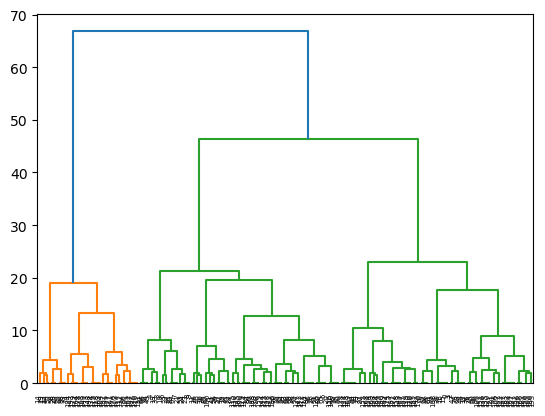

In [10]:
#create a dandogram
dandrogram=sch.dendrogram(sch.linkage(points, method='ward'))

In [11]:
plt.scatter(ranking[0][:,0], ranking[0][:,1])

KeyError: 0

In [12]:
#perform the actual clustering
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [13]:
y_hc=hc.fit_predict(points)

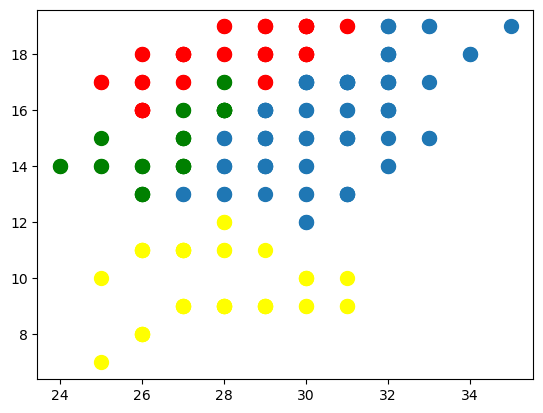

In [14]:
plt.scatter(points[y_hc==0,0],points[y_hc==0,1],s=100)
plt.scatter(points[y_hc==1,0],points[y_hc==1,1],s=100 , c='yellow')
plt.scatter(points[y_hc==2,0],points[y_hc==2,1],s=100 , c='red')
plt.scatter(points[y_hc==3,0],points[y_hc==3,1],s=100 , c='green')

# K-Means Clustering

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans=KMeans(n_clusters=4)

In [17]:
#fit the kmeans obj to the dataset
kmeans.fit(points)

KMeans(n_clusters=4)

In [21]:
clusters=kmeans.cluster_centers_

In [22]:
#print out the clusters
print(clusters)

[[27.81632653 17.6122449  10.20408163  0.6337551 ]
 [27.46938776 14.53061224 12.93877551  0.52934694]
 [28.28       10.26       18.02        0.36262   ]
 [31.5        16.65384615 14.84615385  0.52880769]]


In [23]:
y_km=kmeans.fit_predict(points)

In [24]:
y_km

array([0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0, 3, 3, 1, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 0, 0, 3, 0, 3, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 3, 1, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 3, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 3, 3, 1, 1, 3, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       1, 3, 3, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 1, 3, 1, 1, 1, 2,
       2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0,
       0, 1], dtype=int32)

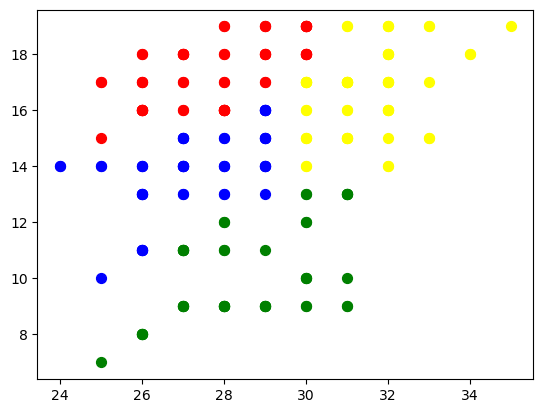

In [28]:
plt.scatter(points[y_km==0,0], points[y_km==0,1], s=50, c='red')
plt.scatter(points[y_km==1,0], points[y_km==1,1], s=50, c='blue')
plt.scatter(points[y_km==2,0], points[y_km==2,1], s=50, c='green')
plt.scatter(points[y_km==3,0], points[y_km==3,1], s=50, c='yellow')

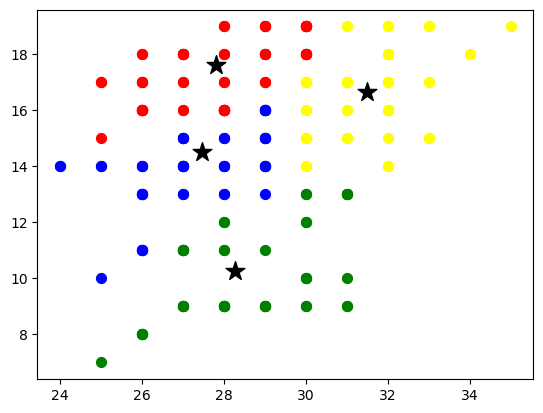

In [31]:
#position the clusters/centrids
plt.scatter(points[y_km==0,0], points[y_km==0,1], s=50, c='red')
plt.scatter(points[y_km==1,0], points[y_km==1,1], s=50, c='blue')
plt.scatter(points[y_km==2,0], points[y_km==2,1], s=50, c='green')
plt.scatter(points[y_km==3,0], points[y_km==3,1], s=50, c='yellow')
plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=200, c='black')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=200, c='black')
plt.scatter(clusters[2][0], clusters[2][1], marker='*', s=200, c='black')
plt.scatter(clusters[3][0], clusters[3][1], marker='*', s=200, c='black')